<a href="https://colab.research.google.com/github/chasrooneyNNHS/Colab/blob/main/EDA_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/chasrooney/Demo/master/Admission_Predict.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
df.shape

(400, 9)

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=400, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
dfdata=df.describe().transpose()
dfdata["IQR"]=dfdata["75%"]-dfdata["25%"]
dfdata

,count,mean,std,min,25%,50%,75%,max,IQR
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00,199.5000
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00,17.0000
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00,9.0000
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00,2.0000
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00,1.5000
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00,1.0000
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92,0.8925
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00,1.0000
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97,0.1900


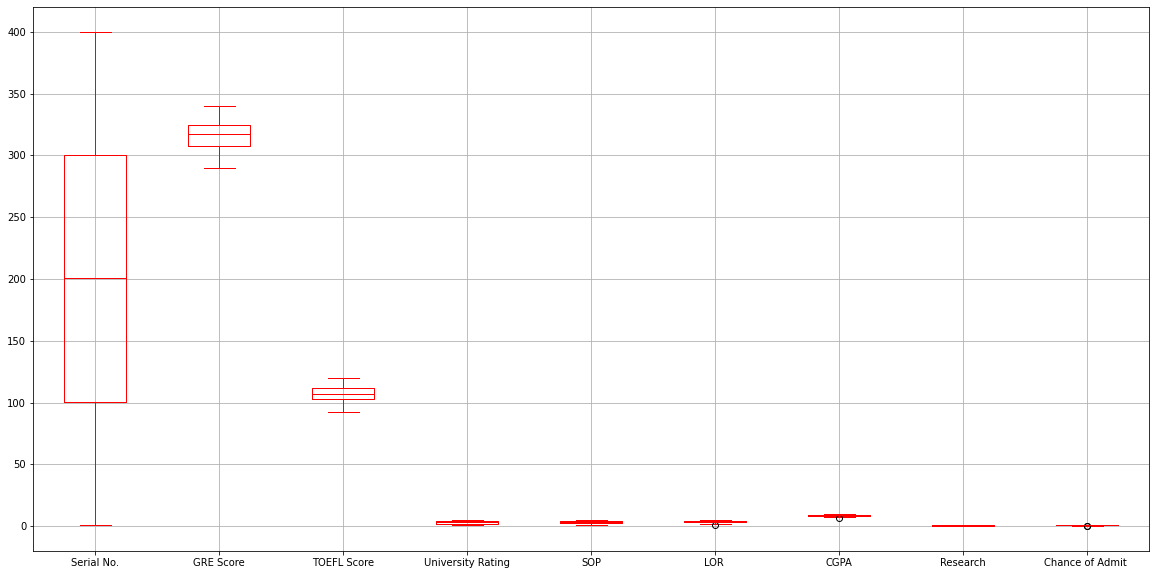

In [ ]:
df.boxplot(figsize=(20,10),color = "red")

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
print("Mean: "+"\n",df.mean())

Mean: 
 Serial No.           200.500000
GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64


In [ ]:
df.quantile(0.75)

Serial No.           300.2500
GRE Score            325.0000
TOEFL Score          112.0000
University Rating      4.0000
SOP                    4.0000
LOR                    4.0000
CGPA                   9.0625
Research               1.0000
Chance of Admit        0.8300
Name: 0.75, dtype: float64

In [ ]:
df.quantile(0.75)-df.quantile(0.25)

Serial No.           199.5000
GRE Score             17.0000
TOEFL Score            9.0000
University Rating      2.0000
SOP                    1.5000
LOR                    1.0000
CGPA                   0.8925
Research               1.0000
Chance of Admit        0.1900
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

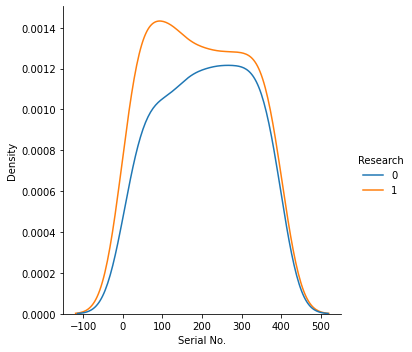

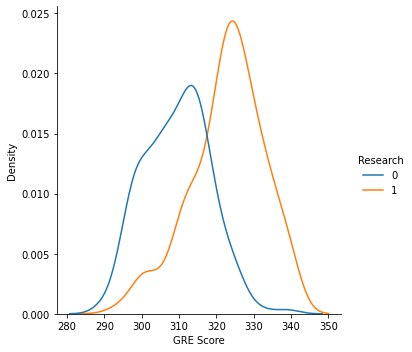

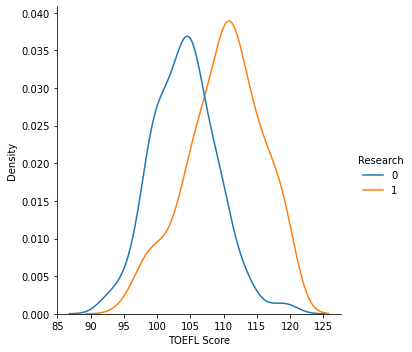

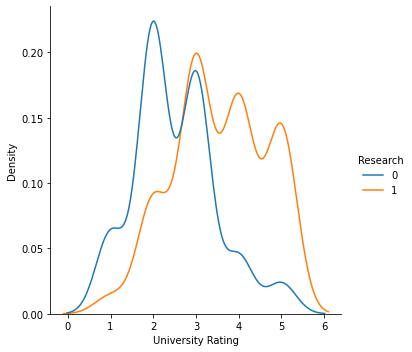

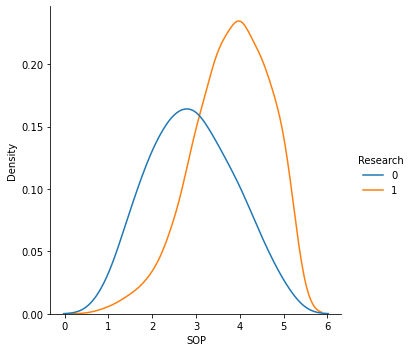

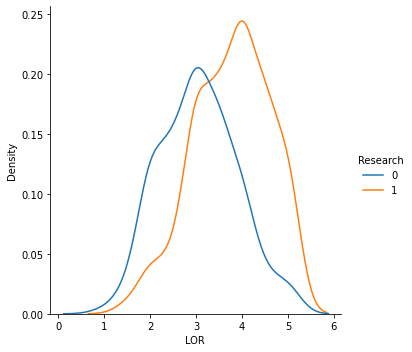

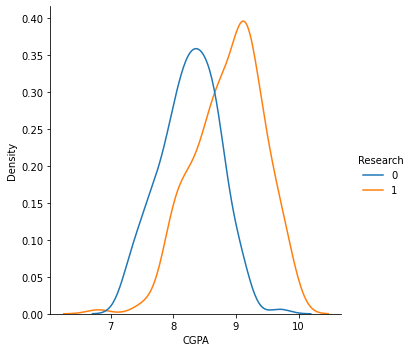

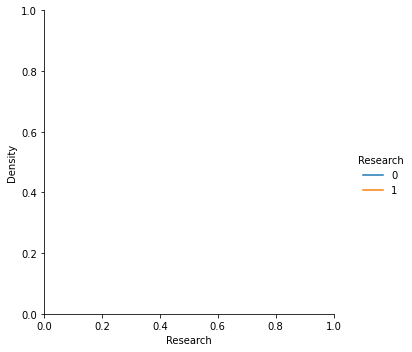

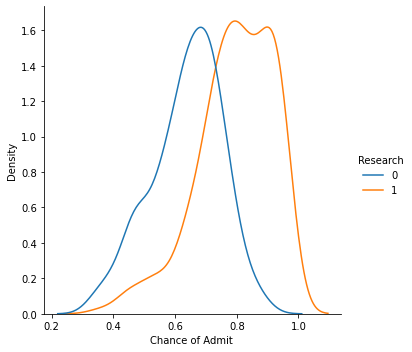

In [ ]:
cols = df.columns
pos = 1
plt.figure(figsize=(15,15))

for i in cols:

  #plt.subplot(3,3,pos)
  #sns.kdeplot(df[i],color = 'green')
  sns.displot(df,x = i,kind = "kde",hue="Research")
  pos += 1

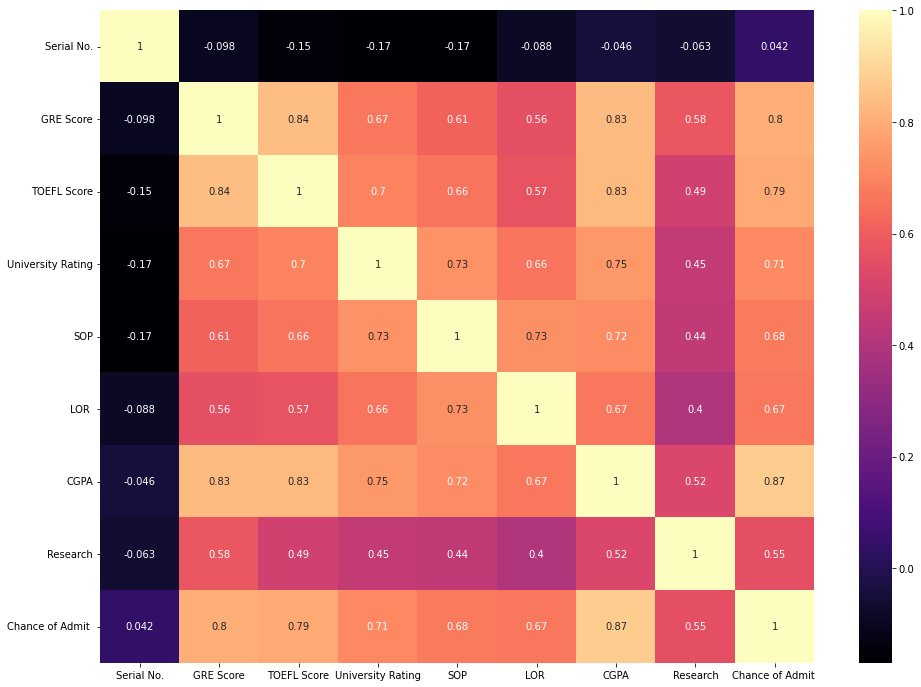

In [ ]:
cor = df.corr()
pos = 1
plt.figure(figsize=(16,12))
sns.heatmap(cor,xticklabels = cor.columns,yticklabels=cor.columns,annot=True,cmap = 'magma')

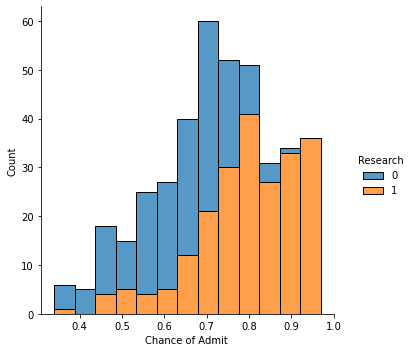

In [ ]:
sns.displot(df, x=i, hue="Research", multiple="stack")

In [ ]:
df3 = pd.read_csv("https://raw.githubusercontent.com/chasrooney/Demo/master/Admission_Predict.csv")

In [ ]:
df3.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df3["fuel"].value_counts()

KeyError: ignored

In [ ]:
!pip install squarify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df3.sample(frac=1).head(n=20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
366,367,320,104,3,3.5,4.5,8.34,1,0.74
359,360,321,107,2,2.0,1.5,8.44,0,0.81
149,150,311,106,2,3.5,3.0,8.26,1,0.79
86,87,315,106,3,4.5,3.5,8.42,0,0.72
238,239,310,104,3,2.0,3.5,8.37,0,0.70
252,253,318,100,2,2.5,3.5,8.54,1,0.71
220,221,313,103,3,4.0,4.0,8.75,0,0.76
195,196,307,107,2,3.0,3.5,8.52,1,0.78
30,31,300,97,2,3.0,3.0,8.10,1,0.65
212,213,338,120,4,5.0,5.0,9.66,1,0.95


In [ ]:
df3.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df3.describe(percentiles=[.01, .25, .5, .75, .99]).apply( 
	lambda s: s.apply('{0:.2f}'.format))

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,200.50,316.81,107.41,3.09,3.40,3.45,8.60,0.55,0.72
std,115.61,11.47,6.07,1.14,1.01,0.90,0.60,0.50,0.14
min,1.00,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
1%,4.99,294.00,94.99,1.00,1.00,1.50,7.30,0.00,0.38
25%,100.75,308.00,103.00,2.00,2.50,3.00,8.17,0.00,0.64
50%,200.50,317.00,107.00,3.00,3.50,3.50,8.61,1.00,0.73
75%,300.25,325.00,112.00,4.00,4.00,4.00,9.06,1.00,0.83
99%,396.01,340.00,120.00,5.00,5.00,5.00,9.80,1.00,0.96
max,400.00,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


In [ ]:

import squarify 
makes = pd.DataFrame(df3.make.value_counts()) 
makes.reset_index(level=0, inplace=True) 
makes = makes.sort_values(by='make', ascending=False).head(20) 
makes.columns = ('make', 'size')
group = df3.groupby(df3.make) 
mean_price = pd.DataFrame(group.price.mean()) 
mean_price.reset_index(level=0, inplace=True) 
makes = pd.merge(makes, mean_price, how='left', on='make')
labels = ["%s\n%d items\nMean price: %d€" % (label) for label in 
	zip(makes['make'], makes['size'], makes['price'])] 
squarify.plot(sizes=makes['size'], label=labels, alpha=.8, 
	color=plt.cm.tab20c.colors, edgecolor="white", linewidth=2) 
plt.axis('off') 
plt.show()

AttributeError: ignored

In [ ]:
makes

In [ ]:
df3.groupby(by = "make").mean()